## Project Instructions

This project is part of the DataCamp Data Analyst in Python career path. The goals for this project are as follows:

- Perform exploratory data analysis on the `netflix_data.csv` data to understand more about movies from the 1990s decade.

- What was the most frequent movie duration in the 1990s? Save an approximate answer as an integer called `duration`.

- A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as `short_movie_count`.


<div style="display: flex; align-items: flex-start;">
    <div style="flex: 1; padding-right: 20px;">
        <img src="../images/netflix.jpg" alt="Imagen de Netflix" style="max-width: 100%; height: auto;">
    </div>
    <div style="flex: 2;">
        <strong>Netflix</strong>! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.
        <br><br>
        Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.
        <br><br>
        You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!
        <br><br>
        You have been supplied with the dataset <span style="color:#ffffff">netflix_data.csv</span>, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!
    </div>
</div>


In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [278]:
# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("../data/raw/netflix_data.csv",parse_dates=['release_year'])

## Exploratory Data

In [279]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016-01-01,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011-01-01,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009-01-01,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008-01-01,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016-01-01,1,A genetics professor experiments with a treatm...,International TV


In [280]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       4812 non-null   object        
 1   type          4812 non-null   object        
 2   title         4812 non-null   object        
 3   director      4812 non-null   object        
 4   cast          4812 non-null   object        
 5   country       4812 non-null   object        
 6   date_added    4812 non-null   object        
 7   release_year  4812 non-null   datetime64[ns]
 8   duration      4812 non-null   int64         
 9   description   4812 non-null   object        
 10  genre         4812 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 413.7+ KB


In [281]:
# Check if each row correspond to one different title.
title_count = netflix_df['title'].nunique()
title_count == len(netflix_df)

True

# Descriptive Analysis
1. Frequency of Show Types: 
Analyze how many shows of each type (e.g., movie, series) are present in the dataset.

2. Distribution of Release Years:
Examine the distribution of shows by their release year to identify trends over time.

3. Distribution of Duration: 
Determine the average, minimum, and maximum duration of shows to understand their length characteristics.

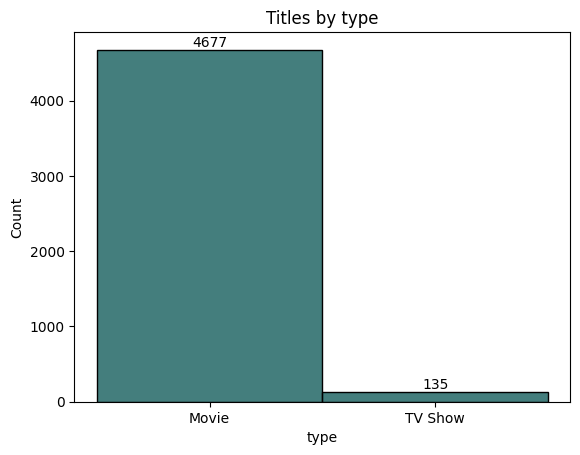

In [282]:
ax = sns.histplot(x='type', data=netflix_df, color='#055351')
plt.title("Titles by type")

# Annotate each bar with its value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),  # Position the text in the middle of the bar
                ha='center', va='center',  # Center text horizontally and vertically
                xytext=(0, 5), textcoords='offset points',  # Offset text slightly above the bar
                fontsize=10, color='black')

plt.show()

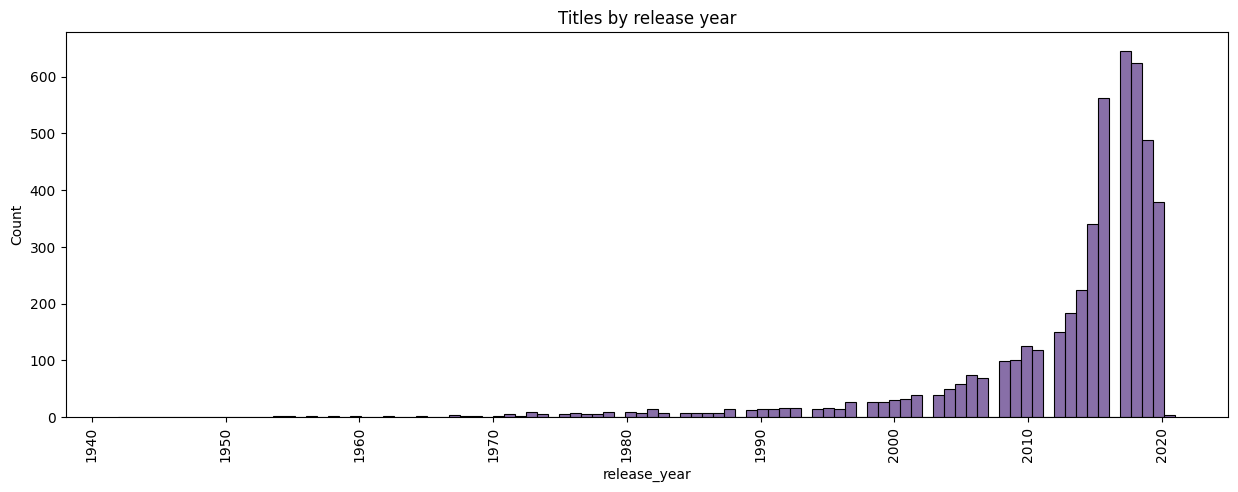

In [283]:
plt.figure(figsize=(15,5))
sns.histplot(x="release_year",data=netflix_df,color='#603F8B')
plt.xticks(rotation=90)
plt.title("Titles by release year")
plt.show()

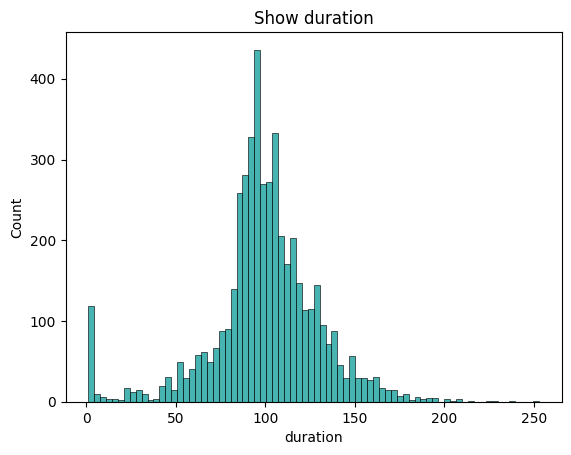

count    4812.000000
mean       99.566708
std        30.889305
min         1.000000
25%        88.000000
50%        99.000000
75%       116.000000
max       253.000000
Name: duration, dtype: float64


In [284]:
sns.histplot(x="duration",data=netflix_df,color='#099B97')
plt.title("Show duration")
plt.show()
print(netflix_df['duration'].describe())

# Genre and Country Analysis
1. Frequency of Genres:
Identify which genres are the most common and if there are any patterns over time.

2. Distribution by Country:
Examine which countries contribute the most shows.

In [285]:
count_by_year = netflix_df.groupby('release_year',as_index=False).size()
count_by_year = count_by_year.rename(columns={'size': 'count_by_year'})
netflix_df = netflix_df.merge(count_by_year[['release_year','count_by_year']],on='release_year',how='left')

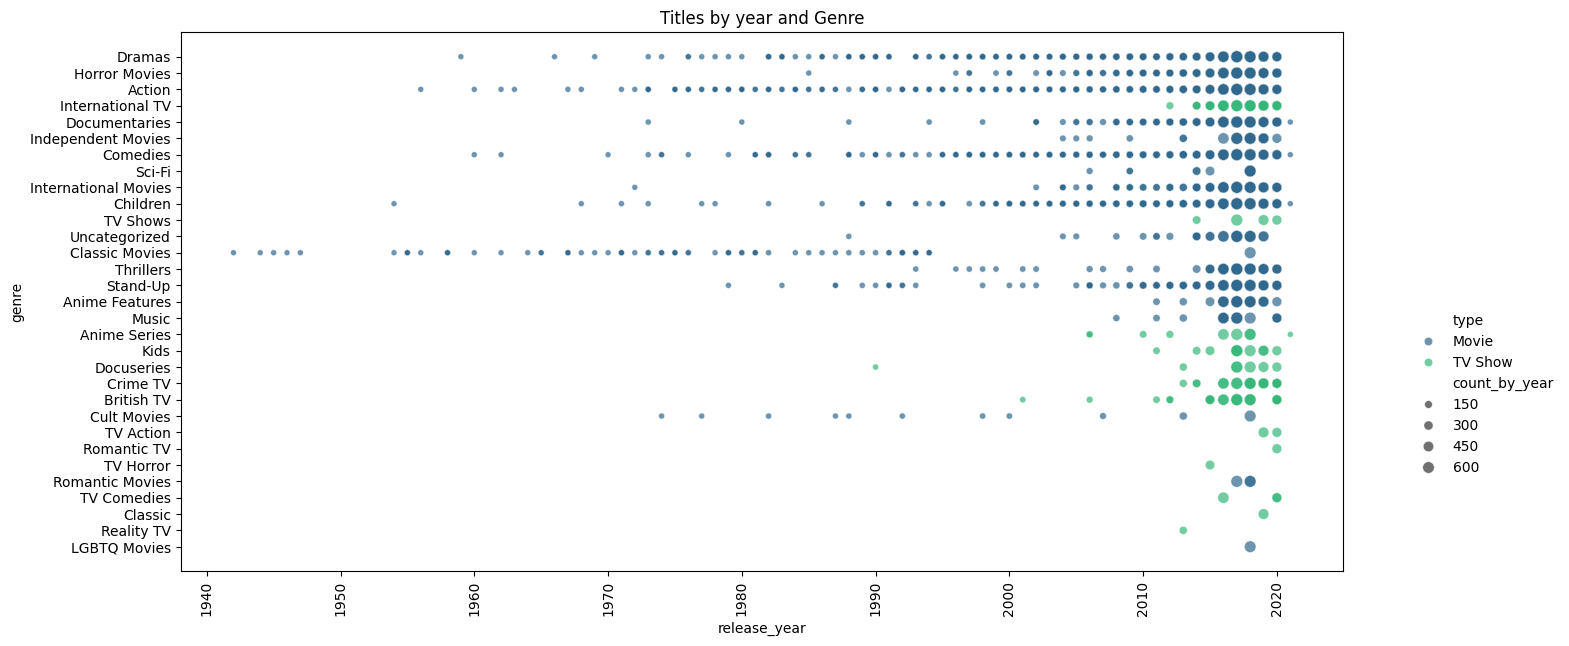

In [286]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="release_year",y='genre',data=netflix_df,hue='type', palette='viridis',size='count_by_year',alpha=0.7)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), frameon=False,ncol=2)
plt.legend(bbox_to_anchor=(1.05, 0.5), frameon=False, ncol=1)
plt.title("Titles by year and Genre")
plt.show()


C:\Users\leper\AppData\Local\Temp\ipykernel_11708\1195341940.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='count_by_country', data=country_counts, palette='viridis')


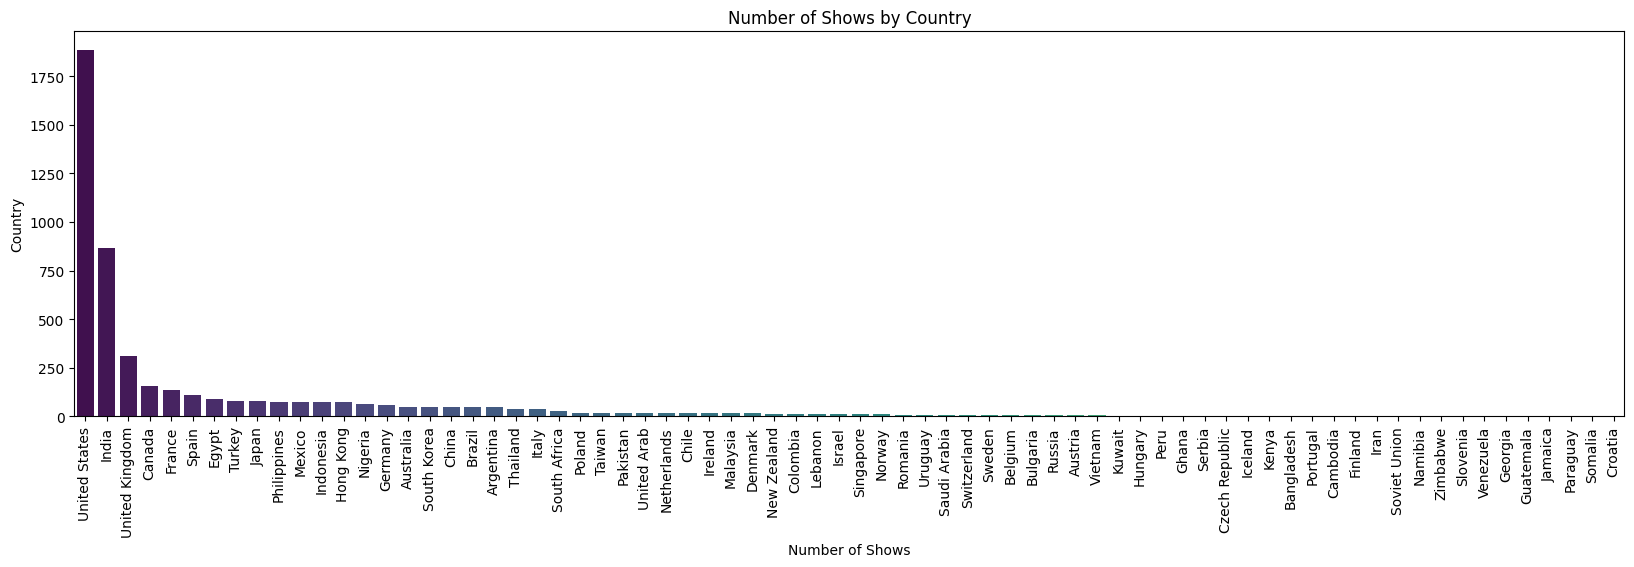

In [287]:
# number of shows by country
country_counts = netflix_df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count_by_country']

plt.figure(figsize=(20, 5))
sns.barplot(x='country', y='count_by_country', data=country_counts, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Shows by Country')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.show()


In [288]:
shows_genre_country = netflix_df.groupby(['country','genre','release_year'],as_index=False).size().sort_values(by='size',ascending=False)
shows_genre_country

,country,genre,release_year,size
1539,United States,Dramas,2017-01-01,54
603,India,Dramas,2017-01-01,54
604,India,Dramas,2018-01-01,53
1538,United States,Dramas,2016-01-01,46
1495,United States,Documentaries,2017-01-01,44
...,...,...,...,...
14,Argentina,Dramas,2006-01-01,1
13,Argentina,Dramas,2004-01-01,1
12,Argentina,Dramas,1998-01-01,1
11,Argentina,Documentaries,2018-01-01,1


## Research on 1990's movies

In [289]:
nf_movies_1990 = netflix_df[np.logical_and(netflix_df['release_year'].dt.year >=1990, netflix_df['release_year'].dt.year <= 2000)]
print(f' Titles from 1990\'s. Include movies and TV shows: \n')
print (nf_movies_1990.info())

 Titles from 1990's. Include movies and TV shows: 

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 6 to 4756
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        214 non-null    object        
 1   type           214 non-null    object        
 2   title          214 non-null    object        
 3   director       214 non-null    object        
 4   cast           214 non-null    object        
 5   country        214 non-null    object        
 6   date_added     214 non-null    object        
 7   release_year   214 non-null    datetime64[ns]
 8   duration       214 non-null    int64         
 9   description    214 non-null    object        
 10  genre          214 non-null    object        
 11  count_by_year  214 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 21.7+ KB
None


In [290]:
netflix_1990_df = nf_movies_1990[(nf_movies_1990['type'] == 'Movie')]
print(f' Movies from 1990\'s: \n')
netflix_1990_df.info()

 Movies from 1990's: 

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 6 to 4756
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        213 non-null    object        
 1   type           213 non-null    object        
 2   title          213 non-null    object        
 3   director       213 non-null    object        
 4   cast           213 non-null    object        
 5   country        213 non-null    object        
 6   date_added     213 non-null    object        
 7   release_year   213 non-null    datetime64[ns]
 8   duration       213 non-null    int64         
 9   description    213 non-null    object        
 10  genre          213 non-null    object        
 11  count_by_year  213 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 21.6+ KB


In [291]:
# mean duration
mean_duration = int(np.mean(netflix_1990_df['duration']))
print(f'Mean duration for a 1990\'s movie: {mean_duration} minutes.\n')

Mean duration for a 1990's movie: 114 minutes.



In [292]:
# Duracion mas frecuente de una pelicula de los 90's
median_duration = int(np.median(netflix_1990_df['duration']))
print(f'Median duration for a 1990\'s movie: {median_duration} minutes.\n')

Median duration for a 1990's movie: 108 minutes.



In [293]:
max_duration = int(np.max(netflix_1990_df['duration']))
print(f'Max duration for a 1990\'s movie: {max_duration} minutes. \n')

Max duration for a 1990's movie: 195 minutes. 



In [294]:
short_movies = netflix_1990_df[np.logical_and(netflix_1990_df['duration'] < 90, netflix_1990_df['genre'] == "Action")]
short_movie_count = short_movies.shape[0]
print(f'Short duration for a 1990\'s action movie: {short_movie_count} minutes. \n')

Short duration for a 1990's action movie: 9 minutes. 

